In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
data = pd.read_csv('./data/fer2013.csv')

## Data preparation

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [4]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
label_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Natural"]

In [6]:
labels = data.Usage.to_numpy()
np.unique(labels)

array(['PrivateTest', 'PublicTest', 'Training'], dtype=object)

In [7]:
data_train = data[data.Usage=='Training']
data_val = data[data.Usage=='PrivateTest']
data_test = data[data.Usage=='PublicTest']

In [8]:
y_train = data_train.emotion.to_numpy()
y_val = data_val.emotion.to_numpy()
y_test = data_test.emotion.to_numpy()

In [9]:
x_train_s = data_train.pixels.to_numpy()
x_val_s = data_val.pixels.to_numpy()
x_test_s = data_test.pixels.to_numpy()

In [10]:
x_train = []
for i in range(x_train_s.shape[0]):
    x_train.append([int(p) for p in x_train_s[i].split(sep=' ')])
    
x_train = np.array(x_train)/255

In [11]:
x_val = []
for i in range(x_val_s.shape[0]):
    x_val.append([int(p) for p in x_val_s[i].split(sep=' ')])
    
x_val = np.array(x_val)/255

In [12]:
x_test = []
for i in range(x_test_s.shape[0]):
    x_test.append([int(p) for p in x_test_s[i].split(sep=' ')])
    
x_test = np.array(x_test)/255

In [13]:
x_train = x_train.reshape(-1,48,48,1)
x_val = x_val.reshape(-1,48,48,1)
x_test = x_test.reshape(-1,48,48,1)

In [14]:
x_train.shape

(28709, 48, 48, 1)

In [15]:
def display_image(image):
    plt.matshow(image, cmap='gray')
    plt.show()

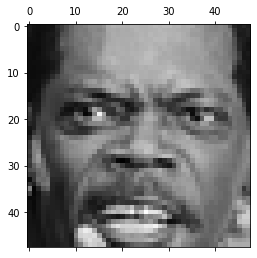

In [16]:
display_image(x_train[10])

## The model

In [45]:
# LeNet architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(30, 6),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(60, 6),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(120, 5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [46]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train,
         epochs = 8,
         validation_data=(x_val, y_val))

Epoch 1/8
898/898 [==============================] - 3s 3ms/step - loss: 1.7361 - accuracy: 0.3003 - val_loss: 1.5850 - val_accuracy: 0.4324
Epoch 2/8
898/898 [==============================] - 2s 3ms/step - loss: 1.4412 - accuracy: 0.4447 - val_loss: 1.4036 - val_accuracy: 0.4570
Epoch 3/8
898/898 [==============================] - 2s 3ms/step - loss: 1.3091 - accuracy: 0.5023 - val_loss: 1.3612 - val_accuracy: 0.4483
Epoch 4/8
898/898 [==============================] - 2s 3ms/step - loss: 1.2183 - accuracy: 0.5336 - val_loss: 1.2967 - val_accuracy: 0.5001
Epoch 5/8
898/898 [==============================] - 2s 3ms/step - loss: 1.1412 - accuracy: 0.5624 - val_loss: 1.3001 - val_accuracy: 0.5166
Epoch 6/8
898/898 [==============================] - 2s 3ms/step - loss: 1.0518 - accuracy: 0.5987 - val_loss: 1.3454 - val_accuracy: 0.5088
Epoch 7/8
898/898 [==============================] - 2s 3ms/step - loss: 0.9711 - accuracy: 0.6331 - val_loss: 1.4219 - val_accuracy: 0.5196
Epoch 8/8
898

## Evaluation

In [48]:
model.evaluate(x_test, y_test)

113/113 [==============================] - 0s 1ms/step - loss: 1.4239 - accuracy: 0.5191


[1.42391037940979, 0.5190861225128174]

In [49]:
def test_sample(sample_index):
    print("Picture:")
    display_image(x_test[sample_index])
    print("")
    
    model_out = model(x_test[sample_index:sample_index+1])
    model_out_string = label_names[np.argmax(model_out)]
    
    print(f"Model predicted: '{model_out_string}'")
    print(f"The label is: '{label_names[y_test[sample_index]]}'")
    
    print("\nProbalities:")
    for label_name,prob in zip(label_names, model_out[0]):
        print(f"{label_name}: {prob*100:{1}.{6}}%")

Picture:


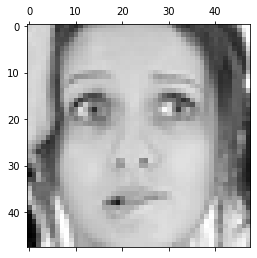


Model predicted: 'Fear'
The label is: 'Fear'

Probalities:
Angry: 2.70747%
Disgust: 0.0541885%
Fear: 58.2438%
Happy: 1.34966%
Sad: 3.45518%
Surprise: 28.707%
Natural: 5.48272%


In [56]:
test_sample(37)